<a href="https://colab.research.google.com/github/MonishSoundarRaj/data_check_generator/blob/main/JSSPP_Plots_and_Metrics_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn
import pandas as pd
from datetime import datetime
from collections import Counter, defaultdict
import json
from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
bw_df = pd.read_csv("blue_waters_data_training.csv")
philly_df = pd.read_csv("philly_data_training.csv")
hl_df = pd.read_csv("helios_data_training.csv")
th_df = pd.read_csv("theta_data_training.csv")
# Syn_data_below
bw_syn_df = pd.read_csv("./synthetic_data_ds_bw.csv")
philly_syn_df = pd.read_csv("./synthetic_data_ds_philly.csv")
helios_syn_df = pd.read_csv("./synthetic_data_ds_helios.csv")
th_syn_df = pd.read_csv("./synthetic_data_ds_theta.csv")

In [3]:
# columns=["job", "user", "project", "state", "gpu_num", "cpu_num", "node_num",  "run_time", "wall_time", "new_status", "interval"]

In [4]:


print(f"Blue Waters shape: {bw_df.shape}")
print(f"Philly shape: {philly_df.shape}")
print(f"Helios shape: {hl_df.shape}")
print(f"Theta shape: {th_df.shape}")
print(f"Synthetic Blue Waters shape: {bw_syn_df.shape}")
print(f"Synthetic Philly shape: {philly_syn_df.shape}")
print(f"Synthetic Helios shape: {helios_syn_df.shape}")
print(f"Synthetic Theta shape: {th_syn_df.shape}")


Blue Waters shape: (15000, 12)
Philly shape: (15000, 13)
Helios shape: (15000, 13)
Theta shape: (15000, 12)
Synthetic Blue Waters shape: (15000, 12)
Synthetic Philly shape: (15000, 13)
Synthetic Helios shape: (15000, 13)
Synthetic Theta shape: (15000, 12)


In [5]:
bw_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0,44,52,50,4,528,28,42,94,24,9.428898,Pass
1,1,47,24,7,90,3072,8000,22,94,37,68.070306,Pass
2,2,64,107,6,16,10752,765,67,14,27,58.548838,Killed
3,3,67,123,58,90,50,165,32,29,84,17.764839,Killed
4,4,67,129,29,500,1920,100,31,91,56,40.402167,Killed


In [6]:
philly_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0,44,52,3,16,0,4,14,50,17,31,3,Killed
1,1,47,24,7,32,0,7,71,92,10,83,32,Failed
2,2,64,107,10,28,0,8,21,61,26,27,7,Killed
3,3,67,123,4,4,0,6,20,47,42,52,69,Failed
4,4,67,129,5,48,0,2,83,47,44,78,41,Pass


In [7]:
helios_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0,44,52,7,1,760,19,67,73,40,38,96,Failed
1,1,47,24,5,4,8,6,70,37,96,21,57,Failed
2,2,64,100,14,144,480,6,75,51,6,66,57,Pass
3,3,67,86,3,48,1,11,80,97,8,32,51,Failed
4,4,67,1,4,152,96,2,47,20,79,44,58,Killed


In [8]:
th_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0,44,24,10,0,219840.0,266.0,6,35.470797,98,59.506911,Killed
1,1,47,36,43,0,65920.0,3262.0,51,91.044345,35,80.050520,Failed
2,2,64,22,6,0,217152.0,206.0,43,59.344768,22,7.618017,Failed
3,3,67,43,7,0,65920.0,192.0,75,96.519962,47,61.395457,Pass
4,4,67,1,36,0,51456.0,156.0,46,64.803335,96,72.763463,Pass


In [9]:
def plot_cdf(x, bins, xlabel, ylabel="Frequency (%)", color="", linestyle="--"):
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        x = np.sort(x)
        cdf = 100 * np.arange(len(x)) / float(len(x))
        if color:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5, color=color)
        else:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.margins(0)
        plt.ylim(0, 100)
        plt.xlim(10**0, 10**8)
        plt.grid(True)
        plt.style.use("default")

# Core Plots

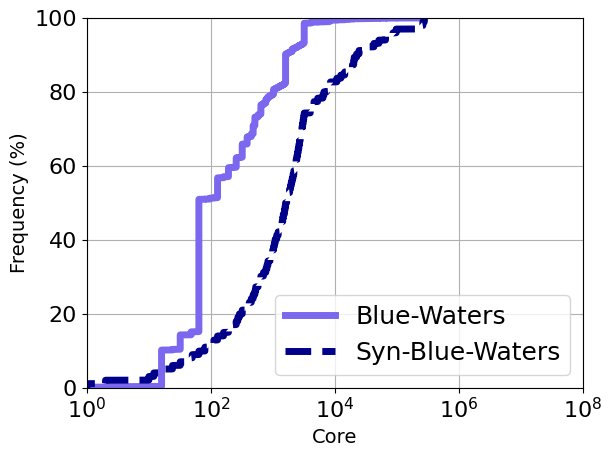

In [10]:
plot_cdf([row["cpu_num"] if row["cpu_num"] != 0 else row["gpu_num"]*16 for _, row in bw_df.iterrows()], 100000, "Core", color = "#7B68EE", linestyle="-")
plot_cdf([row["cpu_num"] if row["cpu_num"] != 0 else row["gpu_num"]*16 for _, row in bw_syn_df.iterrows()], 100000, "Core", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

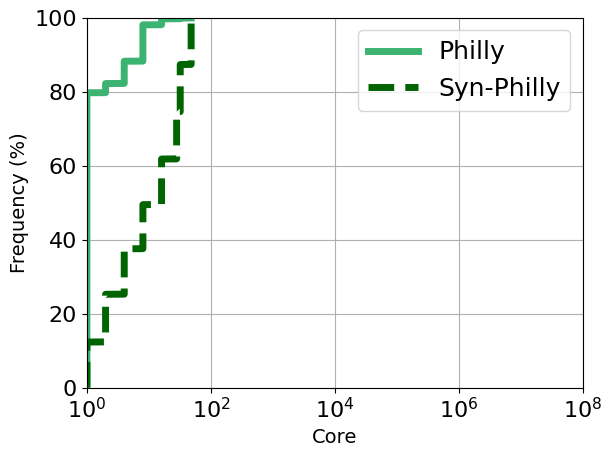

In [11]:
plot_cdf(philly_df["gpu_num"], 100000, "Core", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["gpu_num"], 100000, "Core", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

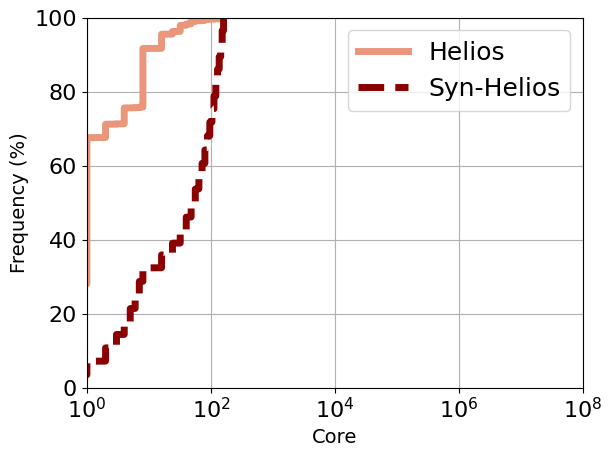

In [12]:
plot_cdf(hl_df["gpu_num"], 100000, "Core", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["gpu_num"], 100000, "Core", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")

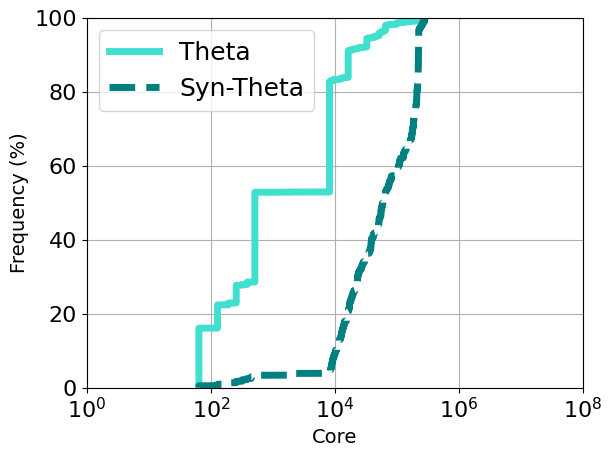

In [13]:
plot_cdf(th_df["cpu_num"], 100000, "Core", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["cpu_num"], 100000, "Core", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

#Run Time Plots

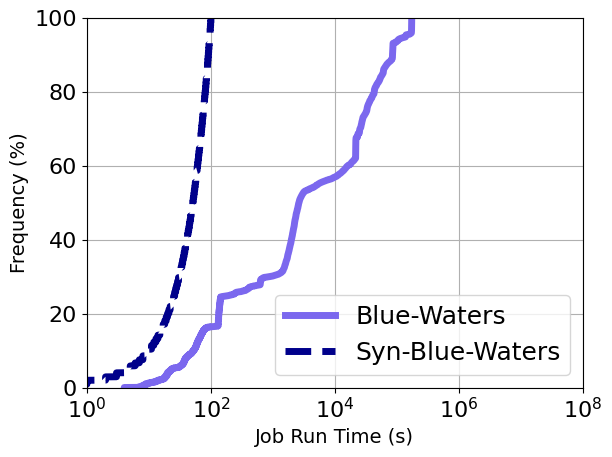

In [14]:
plt.style.use("default")
plot_cdf(bw_df["run_time"], 1000,"Job Run Time (s)", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["run_time"], 1000,"Job Run Time (s)", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

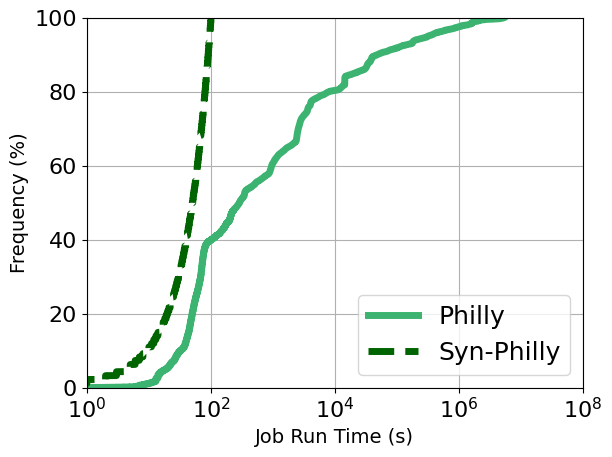

In [15]:
plt.style.use("default")
plot_cdf(philly_df["run_time"], 1000,"Job Run Time (s)", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["run_time"], 1000,"Job Run Time (s)", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

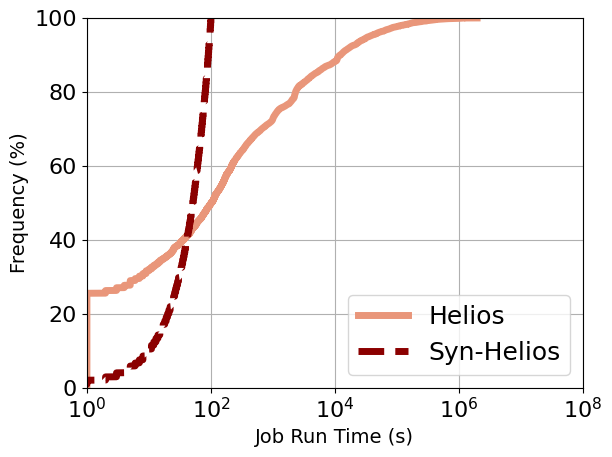

In [16]:
plt.style.use("default")
plot_cdf(hl_df["run_time"], 10009999,"Job Run Time (s)", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["run_time"], 10009999,"Job Run Time (s)", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")

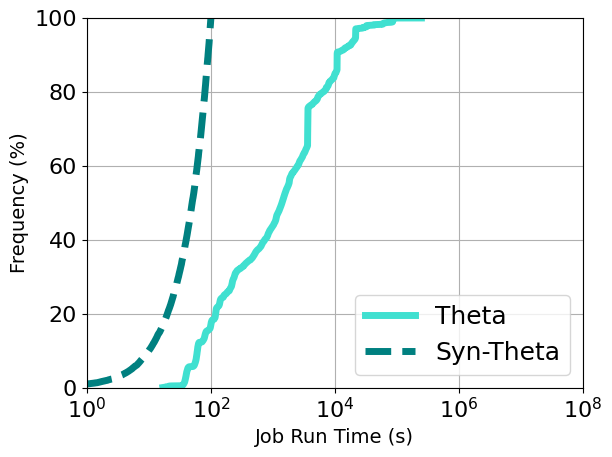

In [17]:
plt.style.use("default")
plot_cdf(th_df["run_time"], 1000, "Job Run Time (s)", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["run_time"], 1000, "Job Run Time (s)", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# Interval Plots


In [18]:
def get_interval(a, peak=False):
    def get_time_of_day2(time):
        time = datetime.fromtimestamp(time)
        return (time.hour + (time.minute>30))%24
    if peak:
        z = a.apply(get_time_of_day2)
        b = a-a.shift(1)
        c = b[(z>=8) & (z<=17)]
        return c
    return a-a.shift(1)

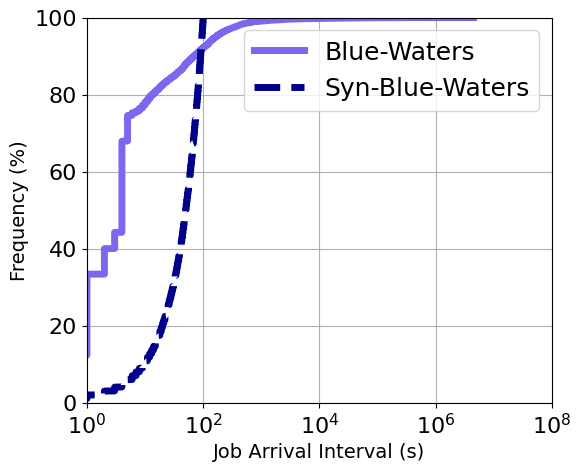

In [19]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(bw_df["interval"], 10000,"Job Arrival Interval (s)", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["interval"], 10000,"Job Arrival Interval (s)", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

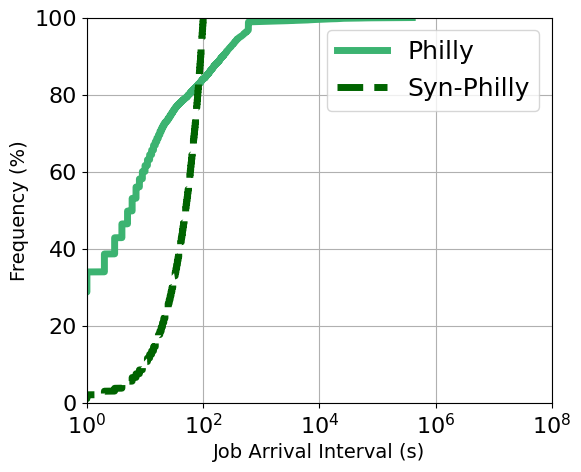

In [20]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(philly_df["interval"], 1000,"Job Arrival Interval (s)", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["interval"], 1000,"Job Arrival Interval (s)", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

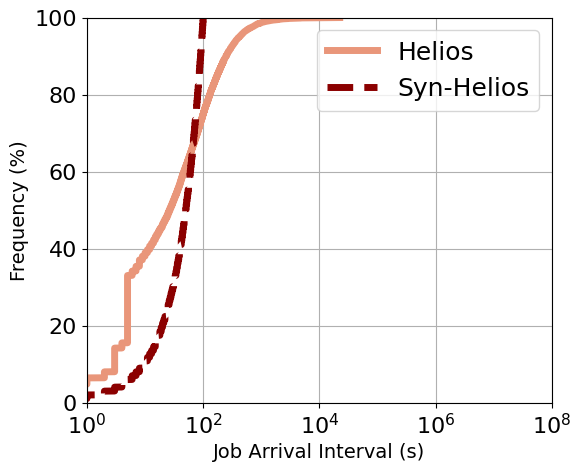

In [21]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(hl_df["interval"], 10009999,"Job Arrival Interval (s)", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["interval"], 10009999,"Job Arrival Interval (s)", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")


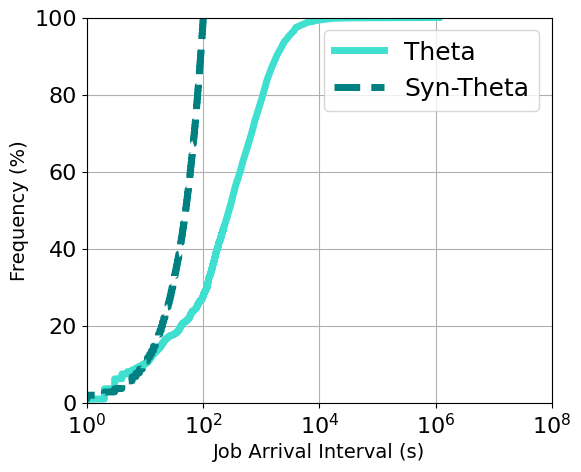

In [22]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(th_df["interval"], 100099,"Job Arrival Interval (s)", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["interval"], 100099,"Job Arrival Interval (s)", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# User CDF Plots

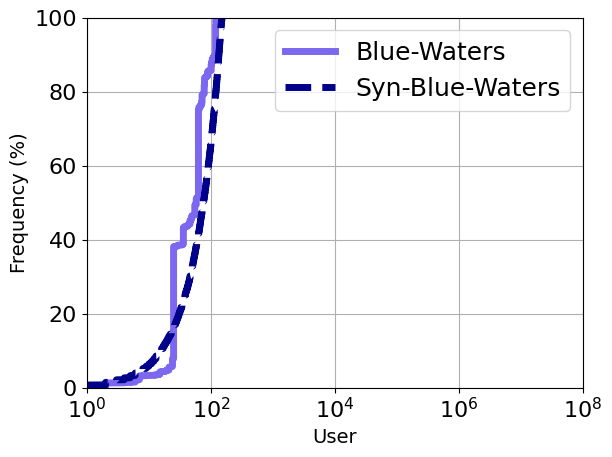

In [23]:
plt.style.use("default")
plot_cdf(bw_df["user"], 1000,"User", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["user"], 1000,"User", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

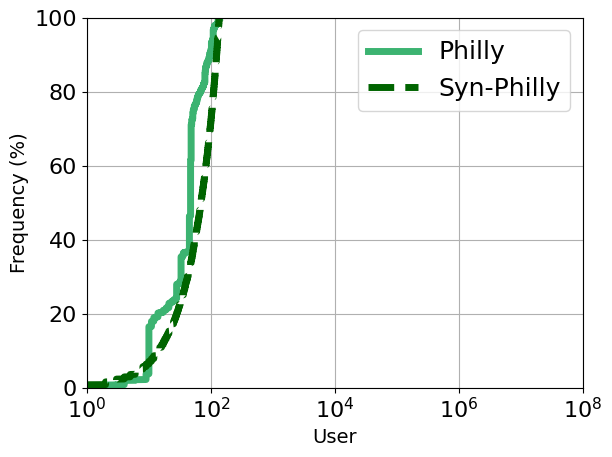

In [24]:
plt.style.use("default")
plot_cdf(philly_df["user"], 1000,"User", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["user"], 1000,"User", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

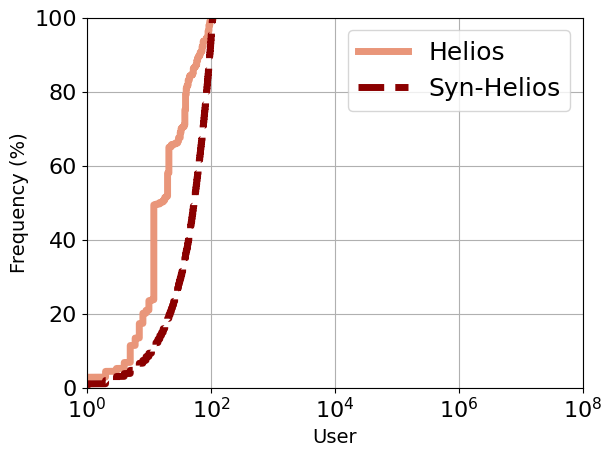

In [25]:
plt.style.use("default")
plot_cdf(hl_df["user"], 10009999,"User", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["user"], 10009999,"User", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")

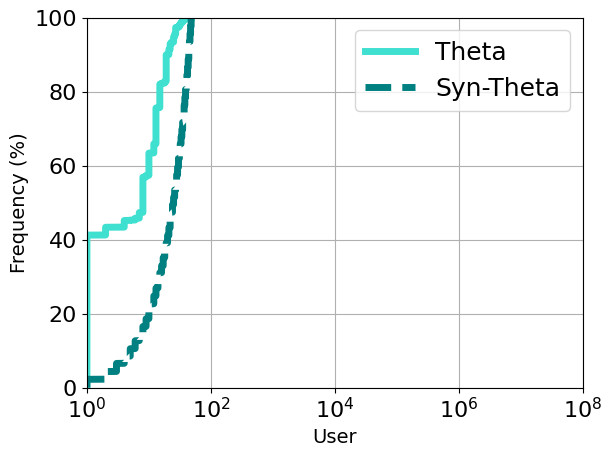

In [26]:
plt.style.use("default")
plot_cdf(th_df["user"], 1000, "User", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["user"], 1000, "User", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# Wall Time Plots

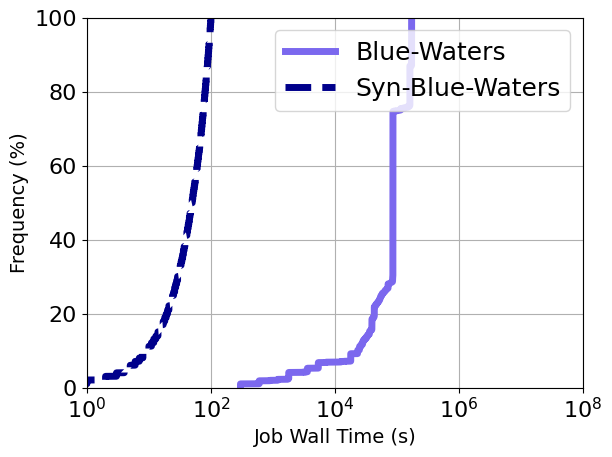

In [27]:
plt.style.use("default")
plot_cdf(bw_df["wall_time"], 1000,"Job Wall Time (s)", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["wall_time"], 1000,"Job Wall Time (s)", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

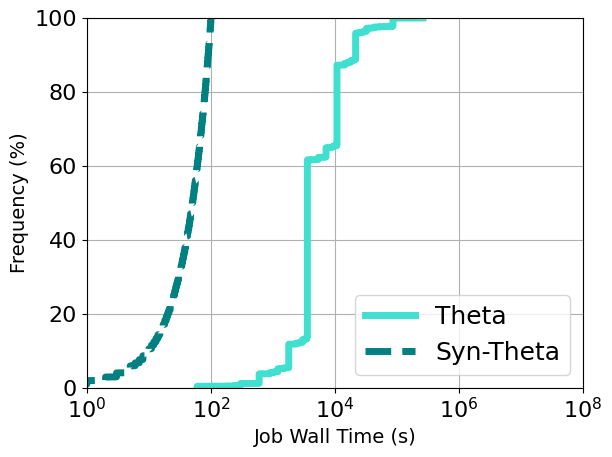

In [28]:
plt.style.use("default")
plot_cdf(th_df["wall_time"], 1000, "Job Wall Time (s)", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["wall_time"], 1000, "Job Wall Time (s)", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# Calc Metrics

In [29]:
import argparse
import pandas as pd
import scipy as sc
import numpy as np
from scipy.stats import entropy
from scipy.stats import wasserstein_distance
import os


'''
This function return a float value. It takes two data files and the interested feature as inputs.
It calculates the distance between these two datasets and outputs a quantitive value.
'''

#A simple function to create a Probability Mass Function out of a dataframe
#Takes in one dataframe as input, and outputs an array containing the probability of each unique event in each field of the dataframe
def createPMF(data):
    length = data.shape[1]
    data = data.values.tolist()
    pmf = []

    #Loop through each of the 13 categories in each job trace
    for i in range(length):
        #Find the number of unique occurences within each category
        #print(i)
        temp = []
        occurence = []
        for col in data:
          #print(col)
          if col[i] not in temp:
            temp.append(col[i])
            occurence.append(1)
            #print(col[i])
          else:
            k = temp.index(col[i])
            occurence[k] += 1

        #Divide each occurence by the total number of datapoints (counting repeats), to get the relative frequency of each element
        total = sum(occurence)
        for i in range(len(occurence)):
          occurence[i] = occurence[i] / total

        #Now add the values and their probabilities to the pmf list
        pmf.append([temp, occurence])

    return pmf

#Function to process the strings in the new_status column (needed for the corr funcs)
def preprocess(data):
    ind = 0
    for i in range(len(data['new_status'])):
        if data.loc[i, 'new_status'] == 'Pass': data.loc[i, 'new_status'] = 1
        if data.loc[i, 'new_status'] == 'Failed': data.loc[i, 'new_status'] = 0
        if data.loc[i, 'new_status'] == 'Killed': data.loc[i, 'new_status'] = -1
        ind += 1

#Function to find and return the Kulback-Leibler divergence of two csv files created using the PMF function above
#Takes in two files, outputting the KL divergences of every feature inside a dataframe
def calc_kl(file1, file2):
    #Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    kl_divs = pd.DataFrame(columns=df1.columns)
    for feature in df1.columns:
        # Get the index of the interested feature
        index = df1.columns.get_loc(feature)
        #Create PMFs from the two DFs (using only the interested feature)
        p = createPMF(df1)[index][1]
        q = createPMF(df2)[index][1]

        index = df1.columns.get_loc(feature)

        # Ensure that both dists are of equal length
        if len(p) > len(q):
            n = len(p) - len(q)
            for i in range(n):
                q.append(1e-20) #Append an incredibly small number to make up for the difference in dataset length. Note that doing this rather than just shortening the sample dataset to 10000 points has little to no difference
        else:
            n = len(q) - len(p)
            for i in range(n):
                p.append(1e-20)

        # Calculate KL divergence
        kl_divs.loc[0, feature] = entropy(p, q)
    print("")
    print("------------Kulback-Leibler Divergence------------")
    print(kl_divs)


#Function to calculate the difference in correlation between a feature shared by two datasets
#Takes in two files as input, outputting a dataframe containing the % difference in the correlation coefficients of the feature in either file
#Results can be interpreted as 'the correlation coefficient of file1's feature is *calc_corr* % larger/smaller than file2's feature
def calc_corr(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    preprocess(df1)
    preprocess(df2)

    corr1 = df1.corr(numeric_only=False)
    corr2 = df2.corr(numeric_only=False)

    #Divide the two correlations to obtain the % difference, storing each entry in a new dataframe
    corr_df = pd.DataFrame(corr1 / corr2)
    print("")
    print("------------Correlation------------")
    print(corr_df)

#Function to calculate how correlated an interested feature is in two different datasets
#Takes in two files, outputting a dataframe containing the correlation coefficients that describes how correlated the features are between either dataset
def calc_corr_with(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    preprocess(df1)
    preprocess(df2)
    print("")
    print("------------Correlation Coefficients------------")
    print(df1.corrwith(df2,numeric_only=True))

#Function to calculate the hellinger distance between a feature shared by two different datasets
#Takes in two files, outputting a dataframe containing the distance metrics for each feature.
def calc_hellinger(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    hellinger = pd.DataFrame(columns=df1.columns)
    for feature in df1.columns:
        # Get the index of the interested feature
        index = df1.columns.get_loc(feature)

        # Create PMFs from the two DFs (using only the interested feature)
        p = createPMF(df1)[index][1]
        q = createPMF(df2)[index][1]

        # Ensure that both dists are of equal length
        if len(p) > len(q):
            n = len(p) - len(q)
            for i in range(n):
                q.append(
                    1e-20)  # Append an incredibly small number to make up for the difference in dataset length. Note that doing this rather than just shortening the sample dataset to 10000 points has little to no difference
        else:
            n = len(q) - len(p)
            for i in range(n):
                p.append(1e-20)

        sum = 0
        for i in range(len(p)):
            sum += (np.sqrt(p[i]) - np.sqrt(q[i])) ** 2

        #print((1 / np.sqrt(2)) * np.sqrt(sum))
        hellinger.loc[0, feature] = (1 / np.sqrt(2)) * np.sqrt(sum)

    print("")
    print("------------Hellinger------------")
    print(hellinger)
    return hellinger

#Function to calculate the wasserstein distance between a feature shared by two different datasets
#Takes in two filesas input, outputting a datatframe containing distance metrics that informs us of how dissimilar all the features are
def calc_wasserstein(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    wassersteins = pd.DataFrame(columns=df1.columns)
    for feature in df1.columns:
        # Get the index of the interested feature
        index = df1.columns.get_loc(feature)

        # Create PMFs from the two DFs (using only the interested feature)
        p = createPMF(df1)[index][1]
        q = createPMF(df2)[index][1]

        #print(wasserstein_distance(p, q))
        wassersteins.loc[0, feature] = wasserstein_distance(p, q)
    print("")
    print("------------Wassersteins------------")
    print(wassersteins)
    return wassersteins


# Blue Waters Calc

In [30]:
calc_kl("blue_waters_data_training.csv", "synthetic_data_ds_bw.csv")
calc_corr("blue_waters_data_training.csv", "synthetic_data_ds_bw.csv")
calc_corr_with("blue_waters_data_training.csv", "synthetic_data_ds_bw.csv")
calc_hellinger("blue_waters_data_training.csv", "synthetic_data_ds_bw.csv")
calc_wasserstein("blue_waters_data_training.csv", "synthetic_data_ds_bw.csv")


------------Kulback-Leibler Divergence------------
  u_id        job      user  project   gpu_num   cpu_num  node_num  interval  \
0  0.0  36.152135  2.257939  2.23251  2.245512  2.073429  2.031509  9.137818   

    run_time  wall_time node_hour new_status  
0  37.122269  11.206746  0.540756   0.412607  

------------Correlation------------
                 u_id         job         user     project     gpu_num  \
u_id         1.000000   86.524012    25.371294  -61.719710   13.495514   
job         86.524012    1.000000    60.937397  104.116320   82.409384   
user        25.371294   60.937397     1.000000   80.661764   27.192354   
project    -61.719710  104.116320    80.661764    1.000000    3.343240   
gpu_num     13.495514   82.409384    27.192354    3.343240    1.000000   
cpu_num     -9.998939  -15.027251     5.105400   22.582293   20.778093   
node_num     0.531778    1.209146     6.966610   45.546826  -19.961201   
interval     3.347899    1.892102    -1.850831    1.543366    5.

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0.0,0.009834,0.009766,0.018537,0.063376,0.014225,0.015225,0.010453,0.009771,0.01009,0.000026,0.2228


# Philly Calc

In [31]:
calc_kl("philly_data_training.csv", "synthetic_data_ds_philly.csv")
calc_corr("philly_data_training.csv", "synthetic_data_ds_philly.csv")
calc_corr_with("philly_data_training.csv", "synthetic_data_ds_philly.csv")
calc_hellinger("philly_data_training.csv", "synthetic_data_ds_philly.csv")
calc_wasserstein("philly_data_training.csv", "synthetic_data_ds_philly.csv")


------------Kulback-Leibler Divergence------------
  u_id        job      user   project   gpu_num cpu_num  node_num   interval  \
0  0.0  36.272199  1.470235  0.897891  1.333237     0.0  1.771799  15.481601   

   run_time wall_time  node_hour  core_hour new_status  
0  38.31484  4.625373  38.342511  38.210025   0.152233  

------------Correlation------------
                 u_id         job       user    project     gpu_num  cpu_num  \
u_id         1.000000   86.488452  26.285472  31.143888   -2.513545      NaN   
job         86.488452    1.000000  62.325788  -4.594047   -3.464719      NaN   
user        26.285472   62.325788   1.000000  20.233247  -16.697611      NaN   
project     31.143888   -4.594047  20.233247   1.000000  -81.902116      NaN   
gpu_num     -2.513545   -3.464719 -16.697611 -81.902116    1.000000      NaN   
cpu_num           NaN         NaN        NaN        NaN         NaN      NaN   
node_num    -4.924480    7.003271   3.823028  10.002407   82.349889      NaN

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0.0,0.009812,0.008748,0.093056,0.167083,0.0,0.235619,0.009883,0.009717,0.990099,0.009718,0.009728,0.156533


# Helios Calc

In [32]:
calc_kl("helios_data_training.csv", "synthetic_data_ds_helios.csv")
calc_corr("helios_data_training.csv", "synthetic_data_ds_helios.csv")
calc_corr_with("helios_data_training.csv", "synthetic_data_ds_helios.csv")
calc_hellinger("helios_data_training.csv", "synthetic_data_ds_helios.csv")
calc_wasserstein("helios_data_training.csv", "synthetic_data_ds_helios.csv")


------------Kulback-Leibler Divergence------------
  u_id        job      user   project   gpu_num   cpu_num node_num   interval  \
0  0.0  36.156911  1.354759  0.746358  1.677651  2.417434  2.58021  23.266107   

    run_time wall_time  node_hour  core_hour new_status  
0  23.267936  4.598526  23.276207  24.052773   0.177747  

------------Correlation------------
                  u_id        job        user     project      gpu_num  \
u_id          1.000000  86.524033  680.441586   57.671637    -0.457265   
job          86.524033   1.000000   13.511080   -2.807416    -0.194060   
user        680.441586  13.511080    1.000000  142.004097     0.610422   
project      57.671637  -2.807416  142.004097    1.000000    27.993820   
gpu_num      -0.457265  -0.194060    0.610422   27.993820     1.000000   
cpu_num      -6.274485  -7.890618    3.981013   51.648152  2113.697191   
node_num      2.680174   1.316395  -46.461006  106.505157  -133.227291   
interval     -1.538389   1.921398    4.3

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0.0,0.009834,0.010845,0.044767,0.051933,0.040418,0.086367,0.009392,0.009779,0.990099,0.009782,0.009802,0.1904


# Theta Calc

In [33]:
calc_kl("theta_data_training.csv", "synthetic_data_ds_theta.csv")
calc_corr("theta_data_training.csv", "synthetic_data_ds_theta.csv")
calc_corr_with("theta_data_training.csv", "synthetic_data_ds_theta.csv")
calc_hellinger("theta_data_training.csv", "synthetic_data_ds_theta.csv")
calc_wasserstein("theta_data_training.csv", "synthetic_data_ds_theta.csv")


------------Kulback-Leibler Divergence------------
  u_id        job      user   project gpu_num  cpu_num  node_num   interval  \
0  0.0  36.156911  1.647846  1.645341     0.0  3.21756  3.259371  36.557491   

   run_time wall_time node_hour new_status  
0  0.129845  2.812861  0.050386   0.228893  

------------Correlation------------
                 u_id        job        user     project  gpu_num     cpu_num  \
u_id         1.000000  86.524037   11.475274   34.890024      NaN   -4.796483   
job         86.524037   1.000000   18.259210   30.246625      NaN   -6.735134   
user        11.475274  18.259210    1.000000  377.668186      NaN  -48.312669   
project     34.890024  30.246625  377.668186    1.000000      NaN   12.579877   
gpu_num           NaN        NaN         NaN         NaN      NaN         NaN   
cpu_num     -4.796483  -6.735134  -48.312669   12.579877      NaN    1.000000   
node_num     5.091945  16.058067  -16.405185   53.621048      NaN  -74.634914   
interval    -1

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0.0,0.009834,0.027658,0.027797,0.0,0.007323,0.007339,0.009577,0.000006,0.0159,0.000002,0.185822
